In [ ]:
# credit card fraud detection

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the data
df = pd.read_csv('/content/creditcard.csv')



In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
df.shape

(284807, 31)

EDA (Exploratory Data Analysis

In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
# compare the values for both transactions
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,26892.929610,-0.210136,0.014404,0.735522,0.173494,-0.226584,0.106817,-0.092752,0.039222,0.185126,...,0.046501,-0.029740,-0.109589,-0.039132,0.010036,0.135999,0.022175,0.004776,0.004927,90.302800
1.0,25259.246269,-7.759814,5.619386,-10.672832,6.111351,-5.776140,-2.360976,-8.192938,4.040000,-3.571525,...,0.507150,0.931331,-0.270332,-0.315606,-0.096976,0.279383,0.168436,0.687503,0.063472,93.928433


In [ ]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

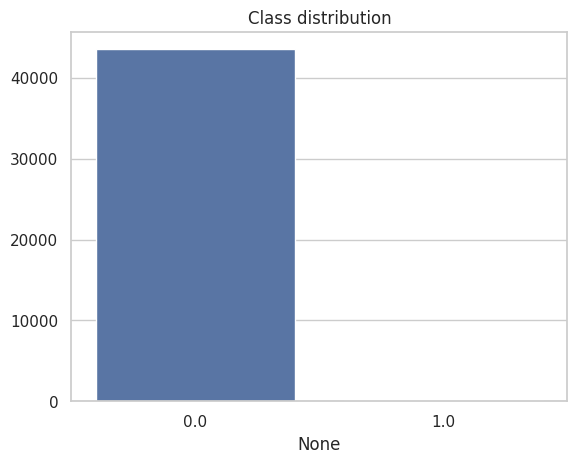

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style = 'whitegrid')

class_counts = df['Class'].value_counts()

sns.barplot(x= class_counts.index, y= class_counts.values)
plt.title('Class distribution')
plt.show()

In [ ]:
# separating the data for analysis
valid = df[df['Class'] == 0]
fraud = df[df['Class'] == 1]

In [ ]:
valid.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,205664.000000,205664.000000,205664.000000,205664.000000,205664.000000,205664.000000,205664.000000,205664.000000,205664.000000,205664.000000,...,205664.000000,205664.000000,205664.000000,205664.000000,205664.000000,205664.000000,205664.000000,205664.000000,205664.000000,205664.0
mean,72542.838703,-0.081433,-0.007783,0.300489,0.058414,-0.090392,0.045067,-0.031346,0.011870,0.013542,...,-0.014290,-0.041198,-0.013974,0.003805,0.055371,0.005256,0.000862,0.001570,89.747258,0.0
std,35784.951563,1.858911,1.604482,1.376612,1.381150,1.331086,1.310866,1.136206,1.162136,1.121258,...,0.712151,0.692373,0.610265,0.604236,0.494943,0.488032,0.390301,0.317414,248.212635,0.0
min,0.000000,-56.407510,-72.715728,-33.680984,-5.683171,-42.147898,-26.160506,-31.764946,-73.216718,-6.290730,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.0
25%,45009.000000,-0.954809,-0.586145,-0.388102,-0.802032,-0.771713,-0.714028,-0.571051,-0.185060,-0.659237,...,-0.226752,-0.536242,-0.168135,-0.343615,-0.248619,-0.331365,-0.067894,-0.043556,5.990000,0.0
50%,68480.500000,-0.067116,0.076646,0.466983,0.065893,-0.155520,-0.221846,-0.003617,0.040058,-0.070386,...,-0.041098,-0.029031,-0.027505,0.051539,0.096830,-0.061127,0.005122,0.017808,23.000000,0.0
75%,102099.250000,1.221071,0.778266,1.205744,0.867611,0.484031,0.442577,0.511133,0.335065,0.624737,...,0.154505,0.436338,0.117555,0.423655,0.382035,0.259474,0.088580,0.077659,79.382500,0.0
max,136047.000000,2.454930,18.902453,9.382558,16.875344,34.801666,22.529298,36.677268,18.709255,15.594995,...,22.614889,10.503090,19.002942,4.022866,7.519589,3.517346,12.152401,33.847808,19656.530000,0.0


In [ ]:
fraud.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,...,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.0
mean,62781.541985,-5.579849,4.152674,-7.660395,4.742284,-4.017895,-1.396601,-6.509509,0.663476,-2.748126,...,0.778507,-0.012563,-0.048989,-0.065777,0.065806,0.038768,0.180565,0.059636,123.386005,1.0
std,35217.306529,7.269289,4.471444,7.752578,2.965619,5.593994,1.950650,7.720983,7.539710,2.675156,...,4.295354,1.628862,1.712146,0.490184,0.841394,0.465620,1.474614,0.575249,257.134306,0.0
min,406.000000,-30.552380,-7.159042,-31.103685,-1.313275,-22.105532,-5.430971,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-1.632653,-4.781606,-1.123534,-7.263482,-1.869290,0.000000,1.0
25%,35926.000000,-7.626924,1.333519,-10.202268,2.507299,-5.829558,-2.651353,-10.632683,-0.222770,-4.099551,...,0.015255,-0.546869,-0.373014,-0.401236,-0.304987,-0.264325,-0.028252,-0.153029,1.000000,1.0
50%,58642.000000,-2.830984,2.941499,-5.140663,4.319241,-2.122693,-1.413476,-3.696178,0.660718,-2.374027,...,0.645103,0.057657,-0.092088,-0.016186,0.106593,-0.027171,0.395201,0.152440,12.310000,1.0
75%,93823.000000,-0.769172,6.147653,-2.066180,6.476731,-0.299803,-0.371634,-1.340739,2.417305,-0.776941,...,1.582556,0.611027,0.333045,0.323586,0.509535,0.366778,0.962015,0.383869,105.890000,1.0
max,135314.000000,1.954852,22.057729,2.250210,12.114672,11.095089,6.474115,5.802537,20.007208,3.353525,...,27.202839,8.361985,5.466230,1.091435,2.208209,2.745261,3.052358,1.779364,2125.870000,1.0


In [ ]:
# Determine number of fraud cases in dataset
fraud = df[df['Class'] == 1]
valid = df[df['Class'] == 0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(df[df['Class'] == 1])))
print('Valid Transactions: {}'.format(len(df[df['Class'] == 0])))



0.0017304750013189597
Fraud Cases: 492
Valid Transactions: 284315


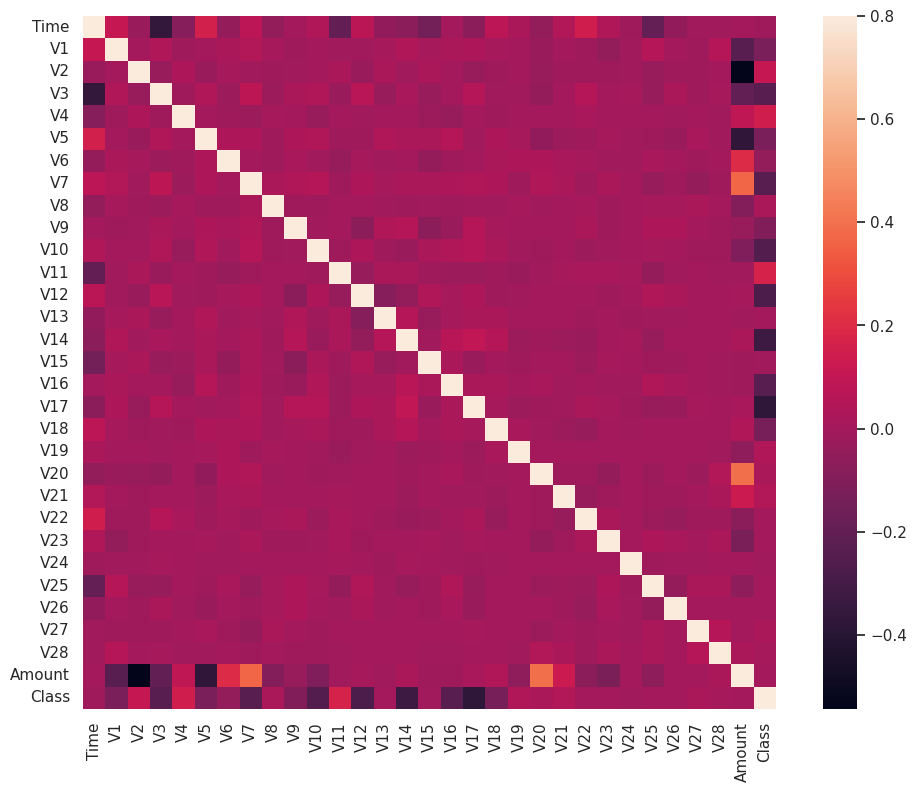

In [ ]:
# Correlation matrix
corrmat = df.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [ ]:
# dividing the X and the Y from the dataset
X = df.drop(['Class'], axis = 1)
Y = df["Class"]
print(X.shape)
print(Y.shape)
# getting just the values for the sake of processing
# (its a numpy array with no columns)
xData = X.values
yData = Y.values

(284807, 30)
(284807,)


In [ ]:
# Using Scikit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
xTrain, xTest, yTrain, yTest = train_test_split(
		xData, yData, test_size = 0.2, random_state = 42)


In [ ]:
# Building the Random Forest Classifier (RANDOM FOREST)
from sklearn.ensemble import RandomForestClassifier
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(xTrain, yTrain)
# predictions
yPred = rfc.predict(xTest)


In [ ]:
print(accuracy_score(yPred, yTest))
print(confusion_matrix(yPred, yTest))

0.9995786664794073
[[56862    22]
 [    2    76]]


In [ ]:
print(classification_report(yTest,yPred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.78      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962



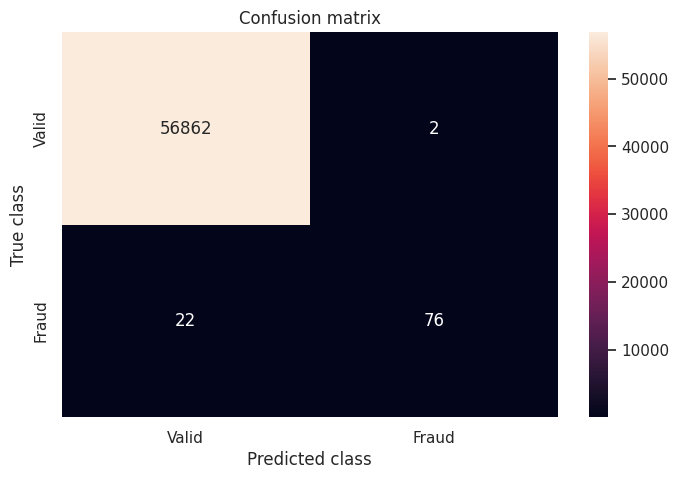

In [ ]:
# printing the confusion matrix
LABELS = ['Valid', 'Fraud']
conf_matrix = confusion_matrix(yTest, yPred)
plt.figure(figsize =(8, 5))
sns.heatmap(conf_matrix, xticklabels = LABELS,
			yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression
classifier= LogisticRegression()
classifier.fit(xTrain, yTrain)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
print("Accuracy:",(accuracy_score(yTest, classifier.predict(xTest))))

Accuracy: 0.9989817773252344


In [ ]:
ypredict=classifier.predict(xTest)
from sklearn.metrics import classification_report,confusion_matrix , accuracy_score
print(classification_report(yTest,ypredict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.71      0.69      0.70        98

    accuracy                           1.00     56962
   macro avg       0.85      0.85      0.85     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion='gini',max_depth=10,random_state=0)
dtree.fit(xTrain,yTrain)

DecisionTreeClassifier(max_depth=10, random_state=0)

In [ ]:
y_pre=dtree.predict(xTest)
print("Accuracy:",(accuracy_score(yTest, dtree.predict(xTest))))

Accuracy: 0.999420666409185


In [ ]:
print(classification_report(yTest,y_pre))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.79      0.82        98

    accuracy                           1.00     56962
   macro avg       0.93      0.89      0.91     56962
weighted avg       1.00      1.00      1.00     56962

